# KMeans Cluster Analysis

Signs of fake reviews include:
- extreme ratings
- unverified purchases
- grand claims
- shorter reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in dataframe that was saved from KMeans modelling which contains cluster labels
df = pd.read_hdf('df_recon_25_kmeans.h5')

In [3]:
df.head()

,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,...,s_without,s_wonderful,s_work,s_work s_great,s_work s_well,s_worked,s_worth,s_would,s_year,cluster
0,-0.775170,0.130820,-0.000413,-0.019576,-0.017527,-0.390110,0.027181,-0.189811,-0.592290,0.899612,...,-0.001082,-0.004690,-0.022467,-0.006027,-0.004932,-0.003369,-0.005859,-0.004412,-0.001885,10
1,-0.027701,0.130989,-0.000588,-0.014156,0.023043,0.518854,0.027032,-0.189789,-0.591678,-0.100244,...,-0.004419,-0.004956,-0.021595,-0.004146,-0.017401,-0.001525,-0.004629,-0.001404,0.000439,23
2,-0.027379,0.131120,-0.000942,-0.027396,-0.013315,0.155422,0.527157,-0.189768,-0.591657,-0.099923,...,-0.005339,-0.006697,-0.022987,-0.006075,-0.016585,-0.005571,0.985175,-0.004227,-0.003288,1
3,0.220779,0.130992,-0.000341,-0.013719,-0.002062,-0.299393,-0.472875,-0.189767,0.409327,-0.100035,...,0.001582,-0.004155,-0.021826,-0.006170,0.001120,-0.000140,-0.003813,-0.006504,-0.001905,19
4,0.222087,0.131062,0.000200,0.005773,-0.003333,0.518911,0.527135,-0.189834,0.408447,-0.100626,...,-0.006357,-0.004761,-0.020962,-0.006938,-0.020888,-0.005158,-0.004115,-0.009082,-0.000179,2


Note that df was reconstructed from principal components so the values can be negative.

### Cluster Analysis

Let's begin by looking at the non-token features.

In [4]:
#getting names of non-token features and cluster for analysis
non_tokens_clust = list(df.columns[0:12]) + ['cluster']

In [5]:
#getting names of token features and cluster for analysis
tokens_clust = list(df.columns[12:])

#### Non-token Features
Let's look for clusters with mainly extreme ratings, unverified purchases, lower amount of helpful votes and shorter reviews.

##### Rating

In [6]:
#let's look at average rating by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,0].sort_values(ascending=False)

cluster
20    0.223125
8     0.223119
2     0.223102
19    0.223085
22    0.223078
7     0.223077
17    0.223047
13    0.222992
0     0.222938
15    0.222879
16    0.221878
24   -0.027335
5    -0.102764
18   -0.131101
14   -0.136376
21   -0.182660
23   -0.210102
1    -0.211103
4    -0.269780
6    -0.276462
3    -0.525984
9    -0.776293
11   -0.776795
10   -0.776860
12   -0.776899
Name: overall, dtype: float64

From here we can see that about half of the clusters have a mean of 0.223 rating. As we know, the data was heavily skewed to high ratings (ie. 5) so this on its own is not informative. What is interesting though is clusters 5 and 16 have the lowest ratings.

##### Verified Purchase

In [7]:
#let's look at average verified purchase by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,1].sort_values(ascending=False)

cluster
20    0.131037
18    0.131029
23    0.131001
1     0.130998
19    0.130995
17    0.130992
2     0.130978
12    0.130974
9     0.109035
0     0.101604
4     0.101229
3     0.095389
5     0.089016
6     0.083828
13    0.082323
24    0.080099
7     0.074524
10    0.070832
16    0.041308
15    0.040364
8     0.032032
21    0.028696
11   -0.868944
22   -0.869057
14   -0.869138
Name: verified, dtype: float64

Very interesting. **Clusters 22 and 8** both have the most negative values which indicate they have the largest number of **unverified** purchases. These are good candidates too look into further.

##### Votes

In [8]:
#let's look at average votes by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,2].sort_values(ascending=False)

cluster
11    0.000934
14    0.000752
22    0.000649
21    0.000391
8     0.000303
12    0.000239
23    0.000010
19   -0.000006
2    -0.000012
18   -0.000013
1    -0.000019
20   -0.000029
9    -0.000042
15   -0.000048
16   -0.000109
17   -0.000126
4    -0.000136
5    -0.000207
0    -0.000229
10   -0.000251
3    -0.000252
7    -0.000321
6    -0.000333
24   -0.000336
13   -0.000341
Name: vote, dtype: float64

Clusters 22 and 8 have the highest number of votes. Strange considering they also had the highest number of unverified purchases.

##### Word Count

In [9]:
#let's look at average review word count by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,3].sort_values(ascending=False)

cluster
14    0.025632
22    0.019474
11    0.017242
21    0.012471
8     0.009766
4     0.005530
18    0.005411
1     0.004217
23    0.004134
20    0.002116
19    0.001709
2     0.001260
5     0.001229
12    0.000676
15   -0.000946
16   -0.001983
17   -0.002296
9    -0.007480
0    -0.008639
13   -0.012156
6    -0.012804
10   -0.012939
3    -0.013031
24   -0.013171
7    -0.013637
Name: review_word_count, dtype: float64

Clusters 22 and 8 have the largest review word counts - this makes sense since they have the largest number of votes since longer reviews tend to have more information so they are more helpful. However, these clusters also have the highest number of unverified purchases which is counter-intuitive. This needs to be looked into further.

#### Reviewer Behaviour
Let's look into **reviewer behaviour**. This may shed some more insight into whats happening in these clusters.

In [10]:
#let's look at multipleReviews_reviewer by cluster which informs us if reviewers post more than 1 review or not
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,7].sort_values(ascending=False)

cluster
20    0.810152
18    0.810111
13    0.810091
8     0.809089
21    0.808744
14    0.172534
22   -0.015927
24   -0.058992
6    -0.067881
3    -0.074710
16   -0.087048
5    -0.092907
11   -0.104010
9    -0.147990
10   -0.149004
12   -0.159288
4    -0.169987
15   -0.188623
7    -0.189835
0    -0.189838
23   -0.189839
1    -0.189842
17   -0.189852
2    -0.189855
19   -0.189857
Name: multipleReviews_reviewer, dtype: float64

Clusters 22 and 8 are part of the lower third of clusters that have the lowest number of reviewers posting more than 1 review (ie. most reviewers post only 1 review). This sort of makes makes sense since these clusters also happen to have the highest number of unverified purchases and as we have seen before, there is a limit on the number of reviews that can be given with unverified purchases.

In contrast, clusters 13, 17, 24, 14 and 0 have the highest number of reviewers with more than 1 review. We want to keep an eye out for those clusters as well as one of our assumptions was that fake reviewers could be incentivized to give a lot of fake 5 star reviews.

In [11]:
#let's look at multipleReviews_reviewer by cluster which informs us if reviewers post more than 1 review or not
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,8].sort_values(ascending=False)

cluster
8     0.408042
2     0.408020
19    0.408018
22    0.408015
20    0.407992
17    0.407926
7     0.407871
0     0.407601
15    0.407194
16    0.403134
13    0.246627
5    -0.587148
24   -0.591912
18   -0.591937
3    -0.591950
11   -0.591976
12   -0.591981
9    -0.591984
23   -0.591995
1    -0.591996
4    -0.591998
6    -0.591999
10   -0.592001
14   -0.592012
21   -0.592018
Name: reviewer_five_star_only, dtype: float64

Cluster 22 among highest cluster with only 5-star reviewers. Notice cluster 8 is amongst the lowest. It you scroll up, it also did not possess extreme ratings as it was in the middle of the pack. This eliminates cluster 8 as we would expect extreme ratings from fake reviews.

From the newly mentioned, clusters 14, 13 and 24 have high amount of 5-star reviewers. Let's revisit their features from above.
- all had among the highest overall ratings
- cluster 13 (and somewhat 14,24) had low amount of verified purchases
- clusters 13 and 14 had high amount of votes where as 24 had the lowest (this raises suspicion on cluster 24)
- clusters 13 and 14 had higher word counts where as 24 was amongst the lowest (this raises further suspicions on cluster 24)
- and as we have seen, all had high amount of reviewers that post multiple reviews

Based on the above, I want to keep a close eye on **cluster 24 and 22** as we move along the analysis.

In addition, I went back and identified cluster 18 as having almost identical features as cluster 24. The main difference between the 2 is cluster 24 has many reviewers that posted more than 1 review where as cluster 18 is the opposite. So I will include **cluster 18** in further analysis as well.

#### Top Tokens per cluster
Let's look at the top tokens per cluster.

In [12]:
#getting the mean token value per cluster
df_tokens = df.loc[:,tokens_clust].groupby('cluster').mean() 

In [13]:
#getting review tokens
df_review = df_tokens.iloc[:,0:1153]

In [14]:
#gettings summary tokens
df_summary = df_tokens.iloc[:,1153:]

In [15]:
#now let's print the top 20 review tokens and top 3 summary tokens for cluster 22
cluster=22
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_skin        0.023610
r_product     0.012545
r_review      0.012392
r_hair        0.011730
r_razor       0.011648
r_using       0.011391
r_also        0.010420
r_feel        0.010257
r_use         0.009986
r_face        0.009961
r_ive         0.009774
r_shave       0.009699
r_cream       0.009510
r_used        0.009278
r_eye         0.008574
r_received    0.008257
r_make        0.008162
r_oil         0.007902
r_day         0.007801
r_really      0.007499
Name: 22, dtype: float64
s_great      0.031958
s_best       0.028284
s_amazing    0.018625
Name: 22, dtype: float64


There is no clear trend in the top words in cluster 22. Let's look at cluster 24.

In [16]:
#now let's print the top 20 review tokens and top 3 summary tokens for cluster 24
cluster=24
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_good              0.057873
r_nice              0.027163
r_work              0.014814
r_ok                0.013514
r_good r_product    0.012505
r_great             0.010101
r_work r_well       0.009059
r_cute              0.008887
r_expected          0.008275
r_pretty            0.006989
r_like              0.006272
r_well              0.004732
r_work r_great      0.004726
r_little            0.003922
r_wish              0.003518
r_described         0.003454
r_pretty r_good     0.003162
r_work r_good       0.003062
r_good r_price      0.002822
r_okay              0.002799
Name: 24, dtype: float64
s_four           0.640134
s_four s_star    0.640085
s_star           0.215806
Name: 24, dtype: float64


Ok this is clear. There are more general positive terms in this cluster. This fits perfectly in our description of fake reviews which would use more general postive terms and lacking personal details.

Cluster 24 is emerging as a clear candidate.

In [17]:
#now let's print the top 20 review tokens and top 3 summary tokens for cluster 18
cluster=18
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_color      0.012533
r_like       0.010809
r_hair       0.006580
r_dont       0.006276
r_smell      0.005700
r_blush      0.005407
r_didnt      0.005077
r_look       0.005016
r_nail       0.004982
r_lip        0.004930
r_would      0.004862
r_little     0.004644
r_however    0.004572
r_use        0.004566
r_though     0.004463
r_soap       0.004237
r_bit        0.004087
r_get        0.004082
r_doesnt     0.004066
r_im         0.004043
Name: 18, dtype: float64
s_good     0.022367
s_like     0.014381
s_color    0.012475
Name: 18, dtype: float64


Just like cluster 24, cluster 18 contains general positive terms so cluster 18 is also a candidate for fake reviews.

Now let's visualize the top tokens that are associated with grand claims (e.g. best product ever!) and let's see which clusters have the highest amount of these tokens

### Visualizing tokens

Let's look at some tokens e.g. excellent, love and great product.

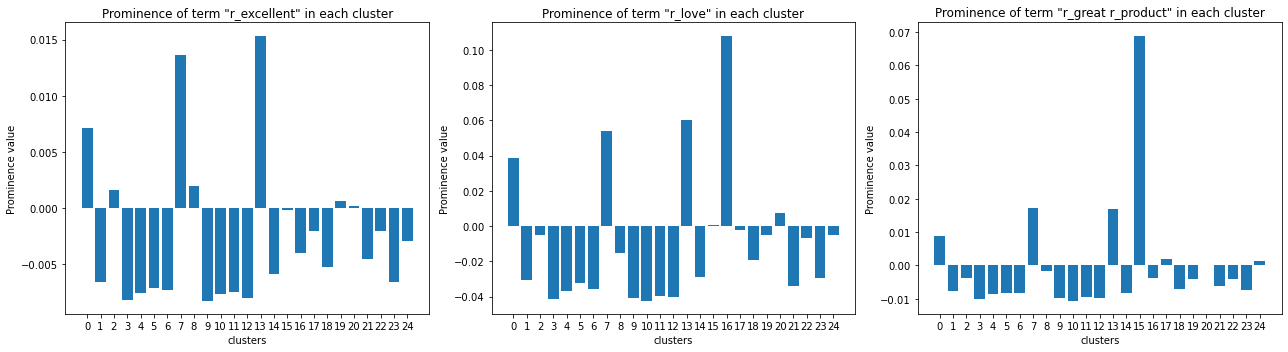

In [18]:
tokens = ['r_excellent','r_love','r_great r_product']
df_tokens = df[tokens+['cluster']].groupby('cluster').mean()

plt.subplots(1,3, figsize=(18,5))
for token in range(len(tokens)):
    plt.subplot(1,3,token+1)
    #plt.figure(figsize=(7,4))
    plt.bar(df_tokens.index, df_tokens[tokens[token]])
    plt.xticks(range(25))
    plt.xlabel('clusters')
    plt.ylabel('Prominence value')
    plt.title(f'Prominence of term "{tokens[token]}" in each cluster')
plt.tight_layout()
plt.show()

As can be seen, clusters 24 and 18 are among the highest, if not highest, clusters for the words excellent, love and great product. We can therefore conclude that these clusters are of lower quality given the shorter word lengths and use of general positive terms. This gives credenece that if fake reviews existed, they would most likely be contained within these 2 clusters.

When I did LDA topic modelling, I noticed one topic had prominent terms such as exchange, discount, received product, unbiased and honest review which all indicate that some reviews were given in exchange for product. These are highly concerning because these reviews may be unreliable. Let's see if we can find a cluster with these terms from the Kmeans model.

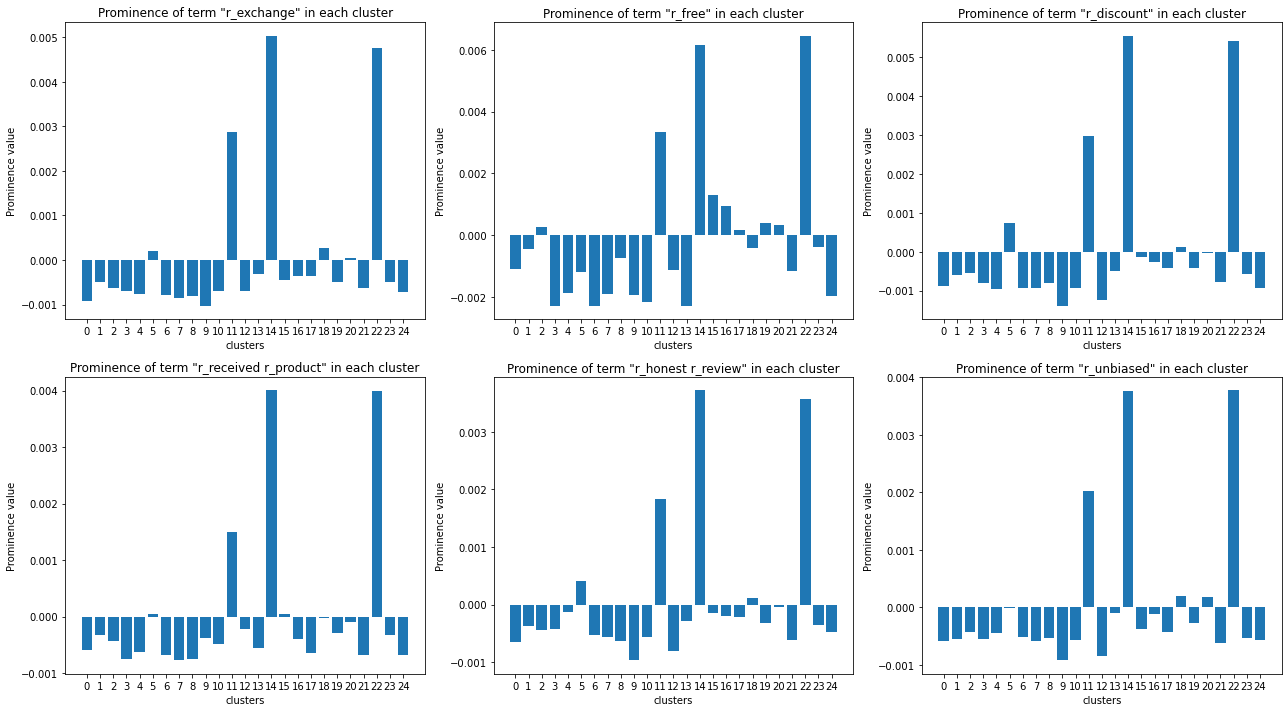

In [19]:
tokens = ['r_exchange','r_free','r_discount','r_received r_product','r_honest r_review', 'r_unbiased']
df_tokens = df[tokens+['cluster']].groupby('cluster').mean()

plt.subplots(2,3, figsize=(18,10))
for token in range(len(tokens)):
    plt.subplot(2,3,token+1)
    #plt.figure(figsize=(7,4))
    plt.bar(df_tokens.index, df_tokens[tokens[token]])
    plt.xticks(range(25))
    plt.xlabel('clusters')
    plt.ylabel('Prominence value')
    plt.title(f'Prominence of term "{tokens[token]}" in each cluster')
plt.tight_layout()
plt.show()

Wow! Cluster 22 (and 8) has the highest values for all the terms mentioned. This solves the mystery of cluster 22. Seemingly people were giving 'honest' or 'unbiased' reviews in exchange for receiving product for free or at a discount. This may explain why the word count is longer as people were trying to give proper reviews of the products. Perhaps the reason there is low amount of verified purchases is beacuse the reviewers were given the product for free externally from Amazon in exchange for reviews. 

This means these reviews aren't necessarily fake but they may be unreliable because the reviews in cluster 22 are all 5 stars so seemingly the reviewers are more incentivized to give good reviews even though they claim to be giving unbiased reviews. As opposed to cluster 8, which only has 2, 3 and 4 star reviews which seems to contain more realistic reviews.

#### Conclusion:
- clusters 24 and 18 have the most telltale features of fake reviews (5 stars, low word count, use of general positive terms)
- the key difference between clusters 24 and 18 is reviewer behaviour. Reviewers in cluster 24 post more than 1 review where as in 18, they have only posted 1 review. This may indicate that some fake reviewers review multiple products where as in other cases, reviewers use different accounts perhaps to review the same product.
- cluster 22 contains reviews of people who may have been incentivized to give good reviews; this does not necessarily mean the reviews are fake but they may be unreliable